# Projet API : Récupération de photos de chien et de chat

L'objectif de ce projet et d'apprendre à utiliser la librairie os ainsi que de s'entrainer à utiliser les API.

In [1]:
import requests
from PIL import Image 
import PIL 
from io import BytesIO
import os
import dotenv

In [2]:
session = requests.Session()
dotenv.load_dotenv('.env')
token = os.getenv('TOKEN')

In [55]:
cats_path = 'https://api.thecatapi.com/v1/'

FUNCTIONS CREATED

In [5]:
def create_dir(parent,name):
    path = os.path.join(parent,name)
    try:
        os.mkdir(path)
    except:
        print('file already exists')

In [22]:
def save_name(species,url):
    breed = url.split('/')[4]
    id = url.split('/')[5]
    return(f'{species}/{breed}{id}')

In [78]:
def save_image(url,size, dir, file):
    img = Image.open(BytesIO(session.get(url).content))
    img = img.resize(size)
    final_path = f'./{dir}/{file}'
    img.save(final_path)

In [99]:
def save_to_file(dir, num, api_path, size, animal):
    new_size = (size, size)
    if animal == 'dog' :
        x = range(num)
        for el in x:
            url = session.get(f'{api_path}').json()['message']
            file_name = save_name(animal,url)
            save_image(url, new_size, dir, file_name)     
    elif animal == 'cat' :
        urls = session.get(f'{api_path}images/search?api_key={token}&limit={num}').json()
        for url in urls:
            file_name = url['url'].split('/')[-1]
            save_image(url['url'], new_size, dir, f'{animal}/{file_name}') 

## Première Partie : 

On va créer des dossiers dans lesquels on va stocker nos photos de chien et de chat. On utilisera ces photos ensuite pour faire de la classification d'image.
Tout d'abord on va créer un dossier 'Train_data' et un dossier 'Test_data'.
Utiliser un try, except pour ne créer le dossier que si il n'est pas encore présent.
Pour cela, on va utiliser le module os importé juste avant.

In [6]:
create_dir('./','train_data')
create_dir('./','test_data')

file already exists
file already exists


Créez maintenant 2 dossiers Dog et Cat dans chacun des dossiers Train_data et Test_data

In [8]:
create_dir('./test_data/','dog')
create_dir('./test_data/','cat')

create_dir('./train_data/','dog')
create_dir('./train_data/','cat')

## Partie 2: 
On va maintenant aller récupérer nos photos de chien sur cet [API](https://dog.ceo/api).
On va d'abord allez en récupérer une au hasard et l'afficher.

In [9]:
dogs_path = 'https://dog.ceo/api/breeds/image/random'

In [16]:
url = session.get(f'{dogs_path}').json()['message']
url

'https://images.dog.ceo/breeds/samoyed/n02111889_9533.jpg'

In [19]:
url.split('/')[4],url.split('/')[5]

('samoyed', 'n02111889_9533.jpg')

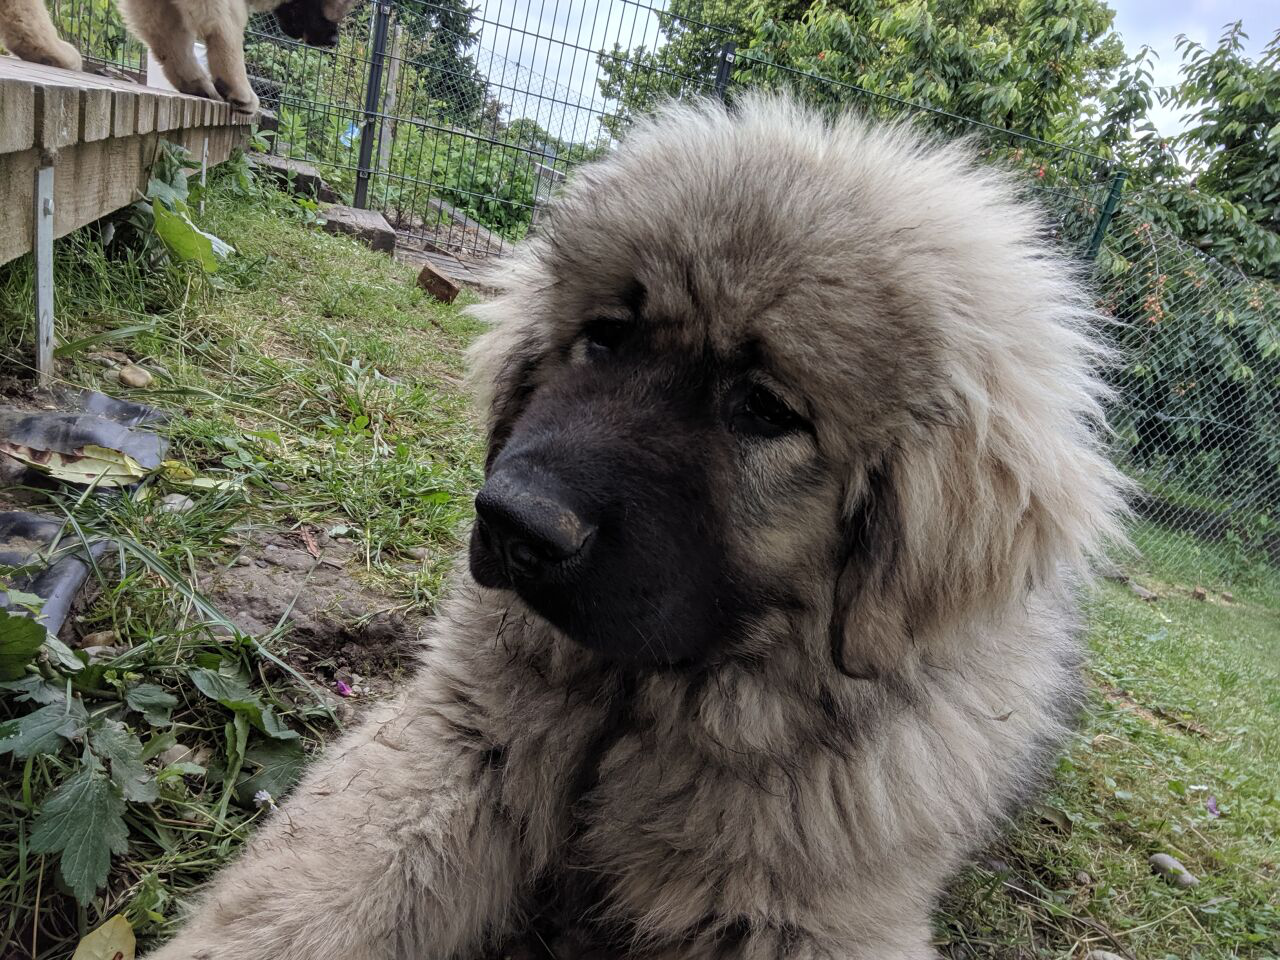

In [15]:
img = Image.open(BytesIO(session.get(url).content))


Maintenant, on va récupérer 500 images de chiens qu'on va stocker dans notre dossier Dog de train_data et 250 qu'on va stocker dans le dossier Dog de test_data.
Avant de les récupérer on va resizer ces images en (150,150).

Attention,il peut y avoir des exceptions qu'il faudra gérer.

In [23]:
save_name('dog',url)

'dog/samoyedn02111889_9533.jpg'

In [42]:
save_to_file('train_data',500,dogs_path,150,'dog')

saved ./train_data/dog/bulldog-englishbunz.jpg
saved ./train_data/dog/entlebuchern02108000_841.jpg
saved ./train_data/dog/briardn02105251_6580.jpg
saved ./train_data/dog/terrier-dandien02096437_1171.jpg
saved ./train_data/dog/lhasan02098413_6113.jpg
saved ./train_data/dog/terrier-norfolkn02094114_2008.jpg
saved ./train_data/dog/dachshundMiniature_Daschund.jpg
saved ./train_data/dog/kelpien02105412_4674.jpg
saved ./train_data/dog/pembroken02113023_3840.jpg
saved ./train_data/dog/terrier-russelllittle1.jpg
saved ./train_data/dog/basenjin02110806_5238.jpg
saved ./train_data/dog/maltesen02085936_10073.jpg
saved ./train_data/dog/poodle-standardn02113799_1474.jpg
saved ./train_data/dog/terrier-kerrybluen02093859_608.jpg
saved ./train_data/dog/kelpien02105412_8018.jpg
saved ./train_data/dog/cockapooGuri8.jpg
saved ./train_data/dog/clumbern02101556_6228.jpg
saved ./train_data/dog/terrier-irishn02093991_4490.jpg
saved ./train_data/dog/chown02112137_8195.jpg
saved ./train_data/dog/terrier-toyn02

In [44]:
save_to_file('test_data',250,dogs_path,150,'dog')

# Partie 3:
On va faire pareil avec les chats. il faut passer par cette [API](https://thecatapi.com)

In [58]:
url_cat = session.get(f'{cats_path}images/search?api_key={token}&limit=5').json()
url_cat

[{'breeds': [],
  'id': '5sg',
  'url': 'https://cdn2.thecatapi.com/images/5sg.jpg',
  'width': 550,
  'height': 367},
 {'breeds': [],
  'id': '7lu',
  'url': 'https://cdn2.thecatapi.com/images/7lu.jpg',
  'width': 500,
  'height': 375},
 {'breeds': [],
  'id': 'boj',
  'url': 'https://cdn2.thecatapi.com/images/boj.jpg',
  'width': 612,
  'height': 612},
 {'breeds': [],
  'id': 'c6q',
  'url': 'https://cdn2.thecatapi.com/images/c6q.jpg',
  'width': 800,
  'height': 638},
 {'breeds': [],
  'id': 'MTk5NTUzNA',
  'url': 'https://cdn2.thecatapi.com/images/MTk5NTUzNA.jpg',
  'width': 760,
  'height': 884}]

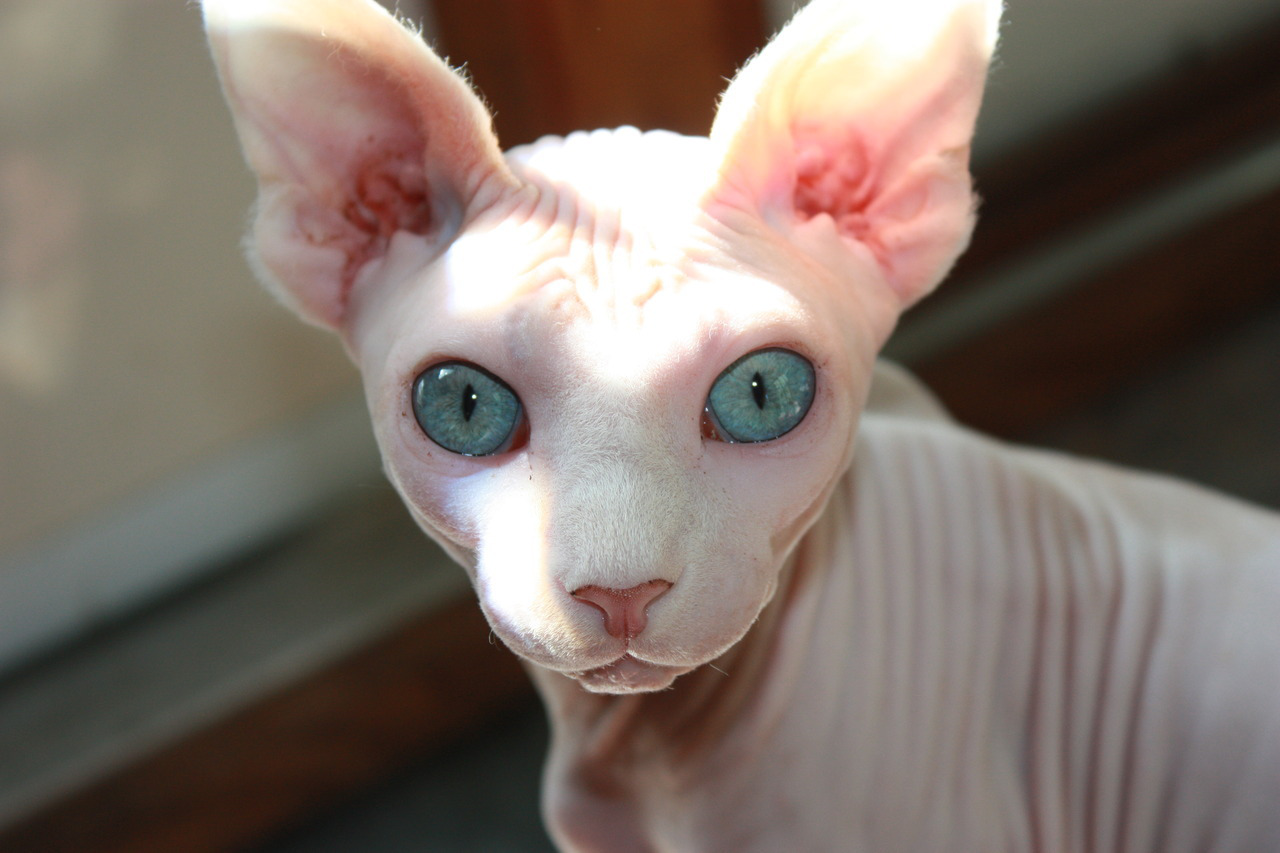

In [45]:
img

On fait pareil qu'avec les chiens en utilisant thecatapi et en mettant les photos dans les dossiers Cat

In [101]:
save_to_file('train_data',500,cats_path,150,'cat')

In [102]:
save_to_file('test_data',250,cats_path,150,'cat')

# Step Bonus:
Tout rassembler dans une fonction, qui va récupérer des photos de chats ou de chiens selon l'argument qu'on lui donne.

In [ ]:
def get_img(n,folder):
    options = ['chats','chiens']

